In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
tdf_train=pd.read_csv("./train.csv")
tdf_test=pd.read_csv("./test.csv")

tdf_train['Sex'] = tdf_train['Sex'].replace(["female", "male"], [0, 1])
tdf_train['Embarked'] = tdf_train['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])
matrix = tdf_train.corr()
print(matrix)

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144  0.042939  0.036847 -0.057527   
Survived       -0.005007  1.000000 -0.338481 -0.543351 -0.077221 -0.035322   
Pclass         -0.035144 -0.338481  1.000000  0.131900 -0.369226  0.083081   
Sex             0.042939 -0.543351  0.131900  1.000000  0.093254 -0.114631   
Age             0.036847 -0.077221 -0.369226  0.093254  1.000000 -0.308247   
SibSp          -0.057527 -0.035322  0.083081 -0.114631 -0.308247  1.000000   
Parch          -0.001652  0.081629  0.018443 -0.245489 -0.189119  0.414838   
Fare            0.012658  0.257307 -0.549500 -0.182333  0.096067  0.159651   
Embarked       -0.030555  0.108669  0.043835 -0.118593  0.012186 -0.060606   

                Parch      Fare  Embarked  
PassengerId -0.001652  0.012658 -0.030555  
Survived     0.081629  0.257307  0.108669  
Pclass       0.018443 -0.549500  0.043835  
Sex         -0.245489 -0.182333 -0.118593  

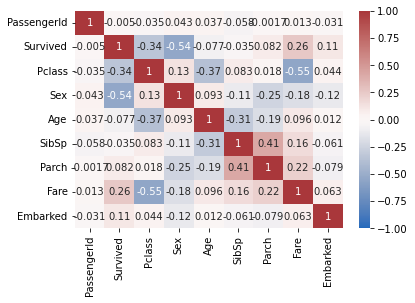

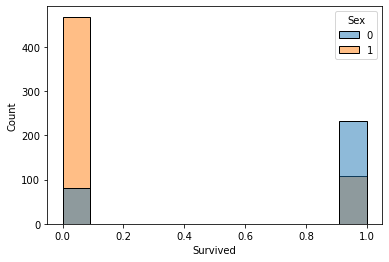

In [6]:
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()
sns.histplot(data=tdf_train, x="Survived", hue="Sex")
classifier=GaussianNB()
tdf_train.dropna(axis=0,inplace=True)
tdf_test['Sex'] = tdf_train['Sex'].replace(["female", "male"], [0, 1])
tdf_test['Embarked'] = tdf_train['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])
tdf_test.dropna(axis=0,inplace=True)
x=tdf_train.loc[:,['Age', 'Embarked', 'Fare', 'Parch', 'Sex', 'SibSp']]
y=tdf_train['Survived']
x_test=tdf_test.loc[:,['Age', 'Embarked', 'Fare', 'Parch', 'Sex', 'SibSp']]
y_test=tdf_test

In [7]:
from sklearn.metrics import accuracy_score
classifier.fit(x,y)
y_pred=classifier.predict(x_test)
print('accuracy is',accuracy_score(y[:13], y_pred))

accuracy is 0.8461538461538461
